<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Final Project - Programming for Data Science 📚</p>
 <p style="font-size: 30px"> <u>Question 2:</u> Which makes Taylor Swift's songs become well-known and attract billions of people around the world? 🎤 </p>

</div>


---

## Member Information 👬
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents 📑
1. [Question](#1-question) <br> 
    1.1 [The purpose of the question](#11-the-purpose-of-the-question)<br>
    1.2 [How to solve the question](#12-how-to-solve-the-question)
2. [Solution](#2-solution) <br>
    2.1 [Pre-processing data](#21-pre-processing-data)<br>
    2.2 [Data analysis](#22-data-analysis)<br>
    2.3 [Answer the question](#23-answer-the-question)<br>
---

## 1. Question


<p style="font-size: 30px;"><strong>🎤 Which makes Taylor Swift's songs become well-known and attract billions of people around the world?</strong></p>

### 1.1 The purpose of the question

Nowadays, there are many artists that are very famous: 'Taylor Swift', 'Beyoncé', 'BTS',... Their songs are very catchy and so good that we can not help but wonder how the artist know that their songs have enough things that catch our ears. But not only aim at specific type of audience but we can see some artists, for ex, each songs of Taylor Swift has different styles but still all of them are very famous and attract wide range of audiences from all over the world. Because how famous and influent Taylor Swift is, our team decide to investigate about her songs and the following attributes to figure out which factors of her song that make her unique among other competitive singers

With this question, Our team hopes that some insights gain from analysing and plotting can help the researchers, artists, composers or anyone who love musics to have some ideas behind what make the artist famous.

### 1.2 How to solve the question

Considering factors from following conditions and make a conclusion from them:

1. Her number of songs compare to other artists
2. Taylor's song and corresponding streams
3. Taylor's highest streams songs 
4. Average streams of her songs
5. Artists with highest number of released songs and their average streams compared to Taylor Swift
6. Date of released songs
7. Song's properties relationship
8. Songs in Top 10 of each Charts(Spotify, Apple, Deezer, Shazam)
9. Songs which are included in most of the playlists in different platforms(Spotify, Apple, Deezer)
10. Song of other artists which Taylor collaborate with

## 2. Solution

### 2.0 Preparation

**📚 Import libraries**

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly==5.18.0
import plotly.express as px # for plotting 3d scatter plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

**📊 Get data**

In [293]:
df = pd.read_csv('./data/processed_spotify-2023.csv', encoding='ISO-8859-1')
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147.0,48.0,113.0,100.0,50.0
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


### 2.1 Pre-processing data

### 2.2 Data analysis

#### Generel view about Taylor Swift and her songs

<p style='text-align: center;font-weight: bold'><i>Taylor Swift's number of songs compare to other artists</i></p>

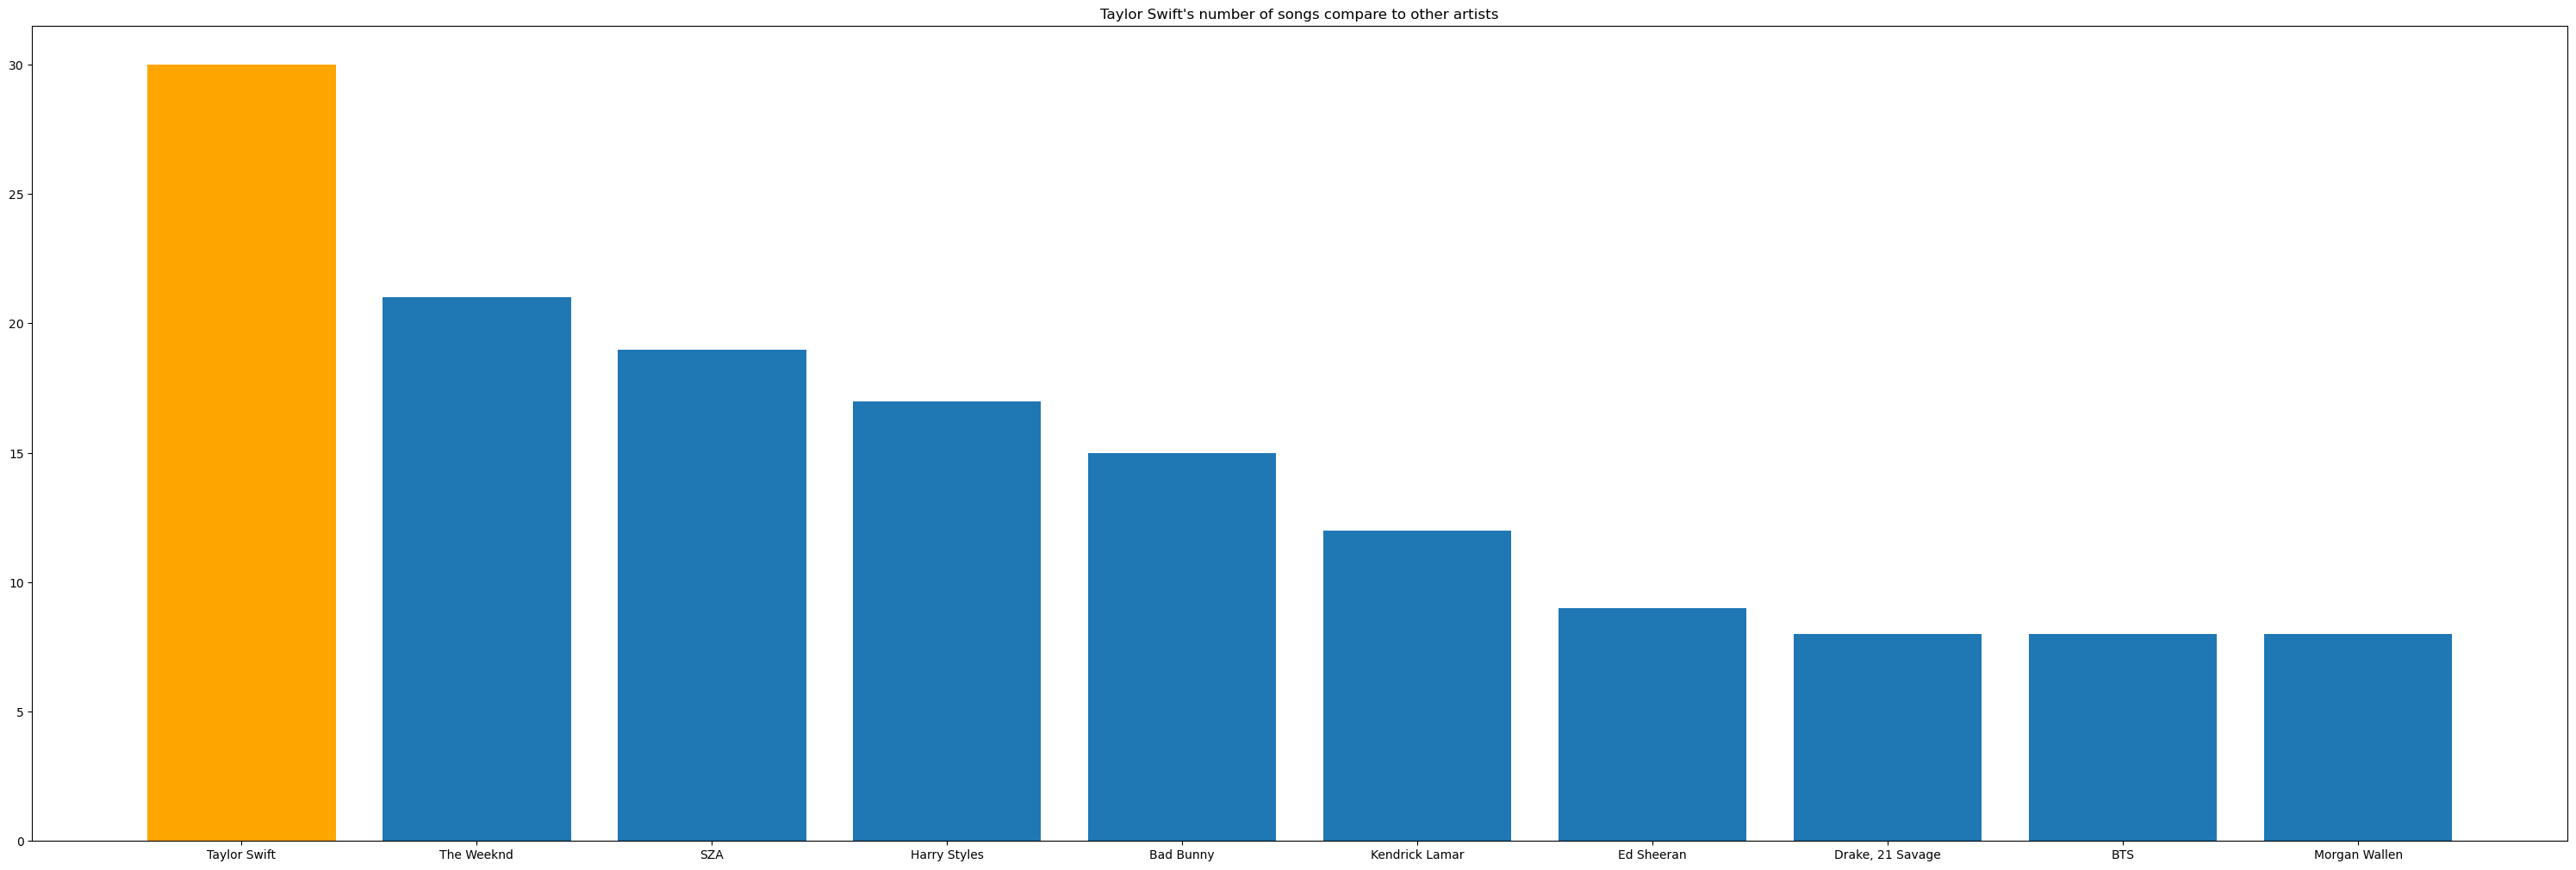

In [294]:
counts = df['artist(s)_name'].value_counts()
labels = counts.index[1:10]
values = counts.values[1:10]
# myexplode = [0.2, 0, 0, 0]
plt.figure(figsize=(30, 10))
plt.bar(counts.index[0], counts.values[0], label='Taylor Swift', color='orange')
plt.bar(labels, values, label='Other artists')
plt.tight_layout()
plt.title('Taylor Swift\'s number of songs compare to other artists')
plt.show()


- 📝 Comment:
  - Number of songs that Taylor released are high compare to other artists.

<p style='text-align: center;font-weight: bold'><i>Taylor's songs and their corresponding streams</i></p>

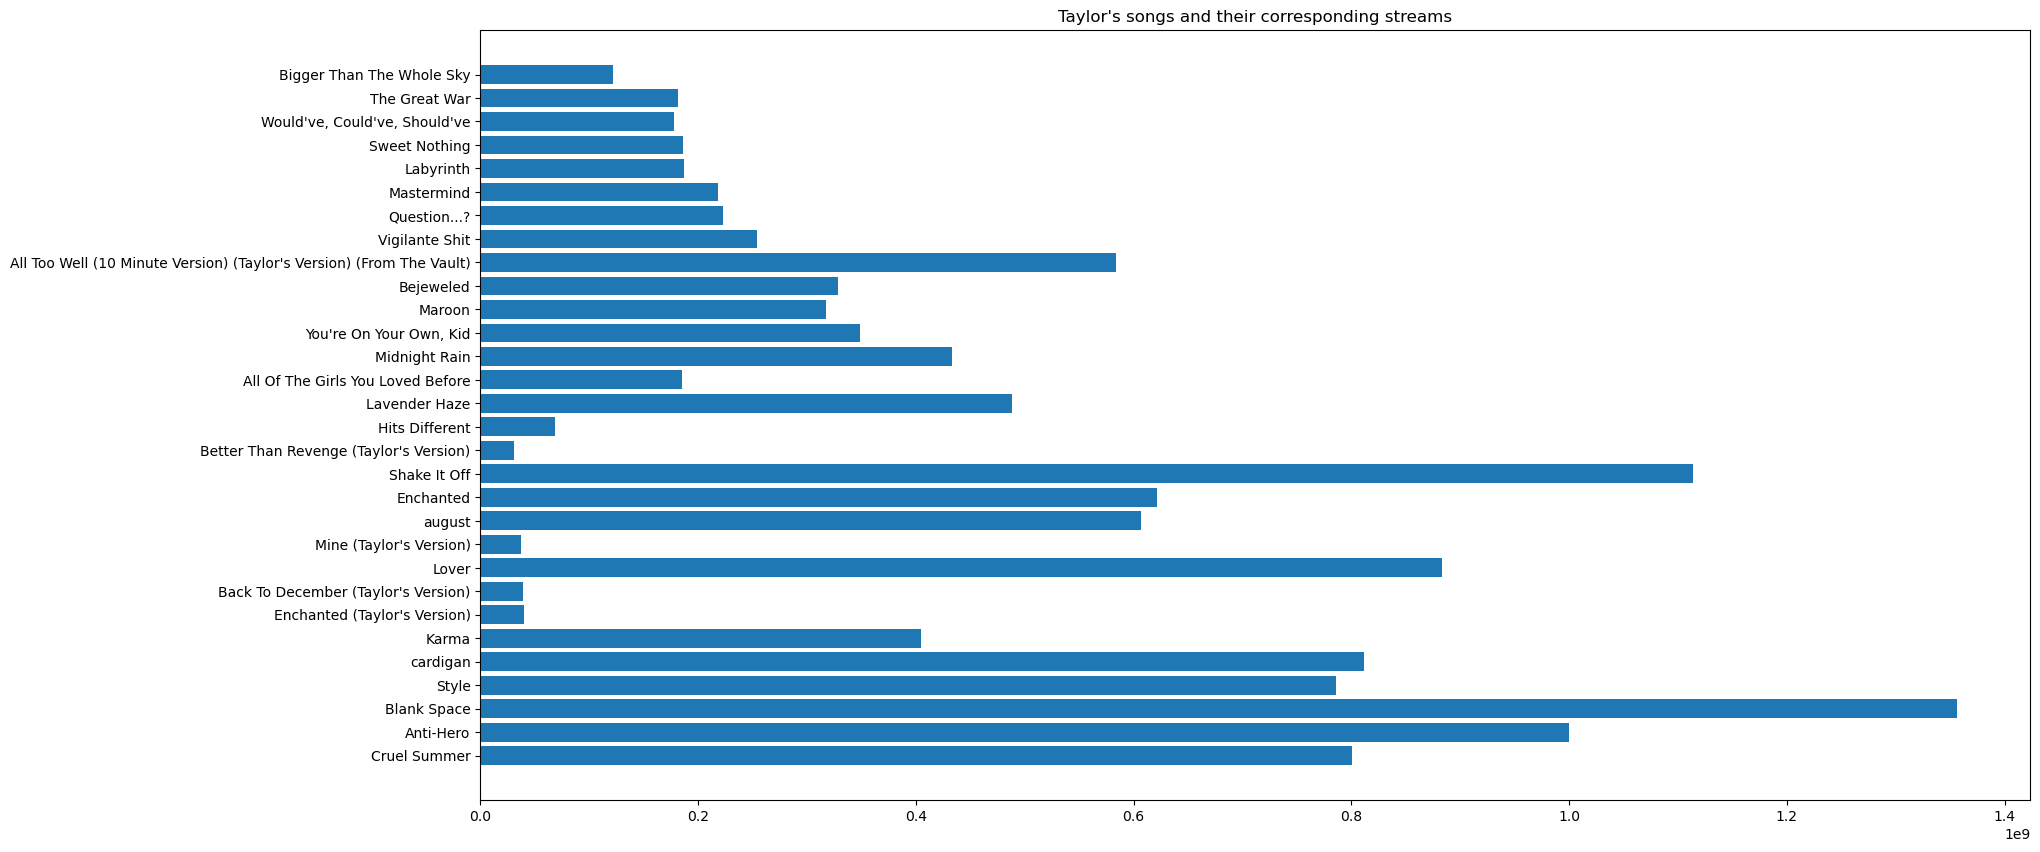

In [295]:
taylor_songs = df[df['artist(s)_name'] == 'Taylor Swift']
names = taylor_songs['track_name']
streams = taylor_songs['streams']

plt.figure(figsize=(20, 10))
plt.barh(names, streams)
plt.title('Taylor\'s songs and their corresponding streams')
plt.show()

- Taylor's highest-stream song and the highest-stream song from dataset

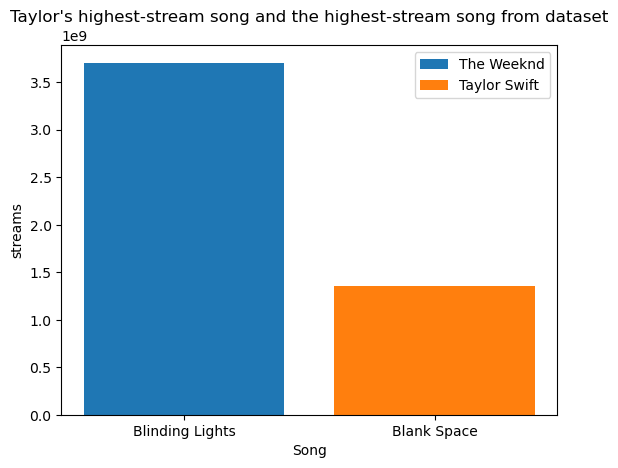

In [296]:
best_one = df.sort_values(by='streams', ascending=False).iloc[:1][['track_name', 'streams', 'artist(s)_name']]
best_taylor_one = taylor_songs.sort_values(by='streams', ascending=False).iloc[:1][['track_name', 'streams', 'artist(s)_name']]
best_one_df = pd.concat([best_one, best_taylor_one])

for index, row in best_one_df.iterrows():
  x = row['track_name']
  y = row['streams']
  plt.title('Taylor\'s highest-stream song and the highest-stream song from dataset')
  plt.ylabel('streams')
  plt.xlabel('Song')
  plt.bar(x, y, label=row['artist(s)_name'])

plt.legend()
plt.show();

- 📝 Comment:
  - We can see that some songs of Taylors have **very high streams**
  - `Blank Space` is the best one of Taylor that we have found so far. However, with the best one in the dataset, we see that `Blank Space's streams` is not significant. 
  

<p style='text-align: center;font-weight: bold'><i>Taylor's highest-stream song compare to the top 10 highest-stream songs in the dataset</i></p>

In [297]:
best_taylor_one

,track_name,streams,artist(s)_name
34,Blank Space,1.355959e+09,Taylor Swift


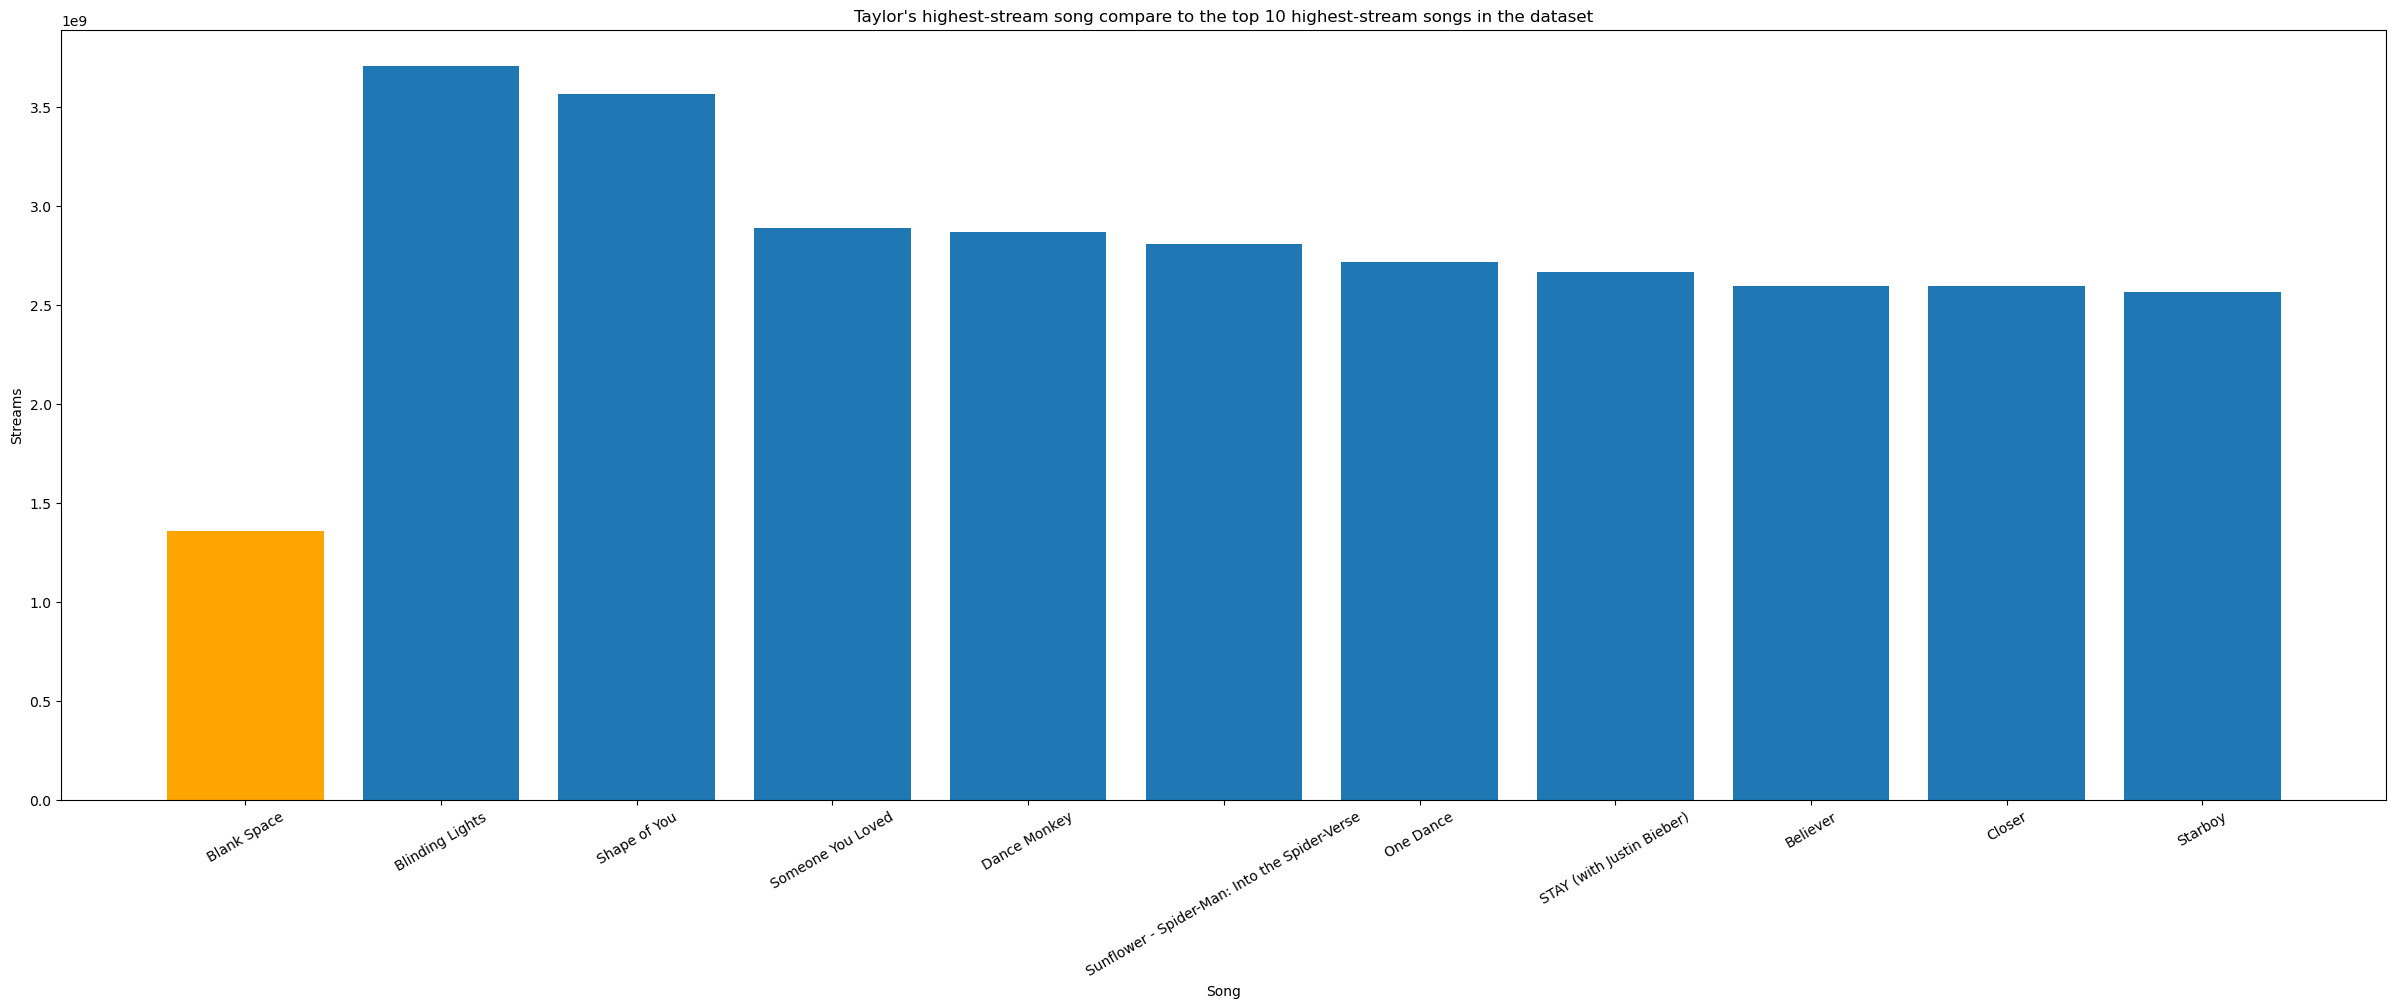

In [298]:
best_songs = df.sort_values(by='streams', ascending=False)

top_10_best_songs = pd.concat([best_songs[:10]])

plt.figure(figsize=(30, 10))
plt.xticks(rotation=30)
plt.bar(best_taylor_one['track_name'], best_taylor_one['streams'], color='orange')
plt.bar(top_10_best_songs['track_name'], top_10_best_songs['streams'])
plt.title('Taylor\'s highest-stream song compare to the top 10 highest-stream songs in the dataset')
plt.ylabel('Streams')
plt.xlabel('Song')
plt.show();

- 📝 Comment:
  - The best song of Taylor's `Blank Space` with top 10 highest-stream songs is also not significant.

<p style='text-align: center;font-weight: bold'><i>Taylor's average streams compare to Top 10 artists with highest average-stream</i></p>

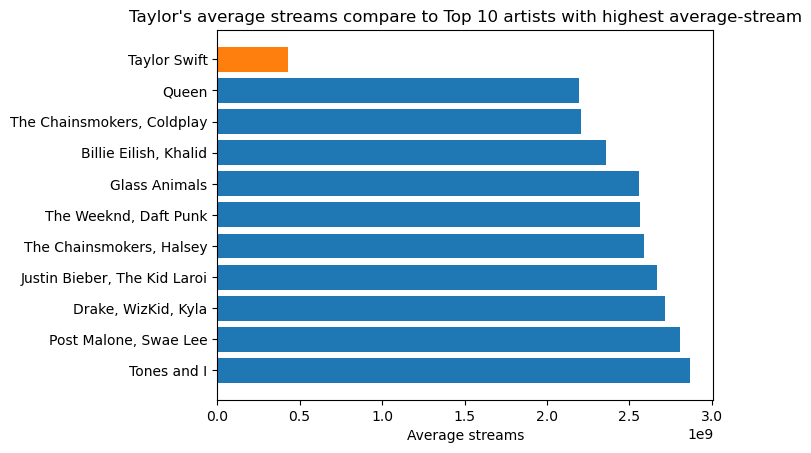

In [299]:
avg_streams = df[['artist(s)_name', 'streams']].groupby(by='artist(s)_name').mean().sort_values(by='streams', ascending=False)

avg_streams.reset_index(inplace=True)
x = avg_streams['artist(s)_name'][:10]
y = avg_streams['streams'][:10]

plt.barh(x, y);
plt.barh('Taylor Swift', avg_streams[avg_streams['artist(s)_name'] == 'Taylor Swift']['streams'])
plt.title('Taylor\'s average streams compare to Top 10 artists with highest average-stream')
plt.xlabel('Average streams')
plt.show();

- 📝 Comment:
  - Taylor Swift's average streams are not very remarkable compared to the top Artists who has the highest average streams of all. However, We know that Taylor release so many songs. Therefore, the average streams of Taylor is not high as we can expected before
  - To see how average streams of Taylor songs, we need to find the artist who released the highest number of songs and their average streams


<p style='text-align: center;font-weight: bold'><i>Top 5 Artists with the highest number of released songs and corresponding average streams compare to Taylor Swift</i></p>

  Top 5 artists with the highest number of released songs(Taylor Swift is top 1)

In [300]:
labels = df['artist(s)_name'].value_counts()[:6].index
labels

Index(['Taylor Swift', 'The Weeknd', 'SZA', 'Harry Styles', 'Bad Bunny',
       'Kendrick Lamar'],
      dtype='object')

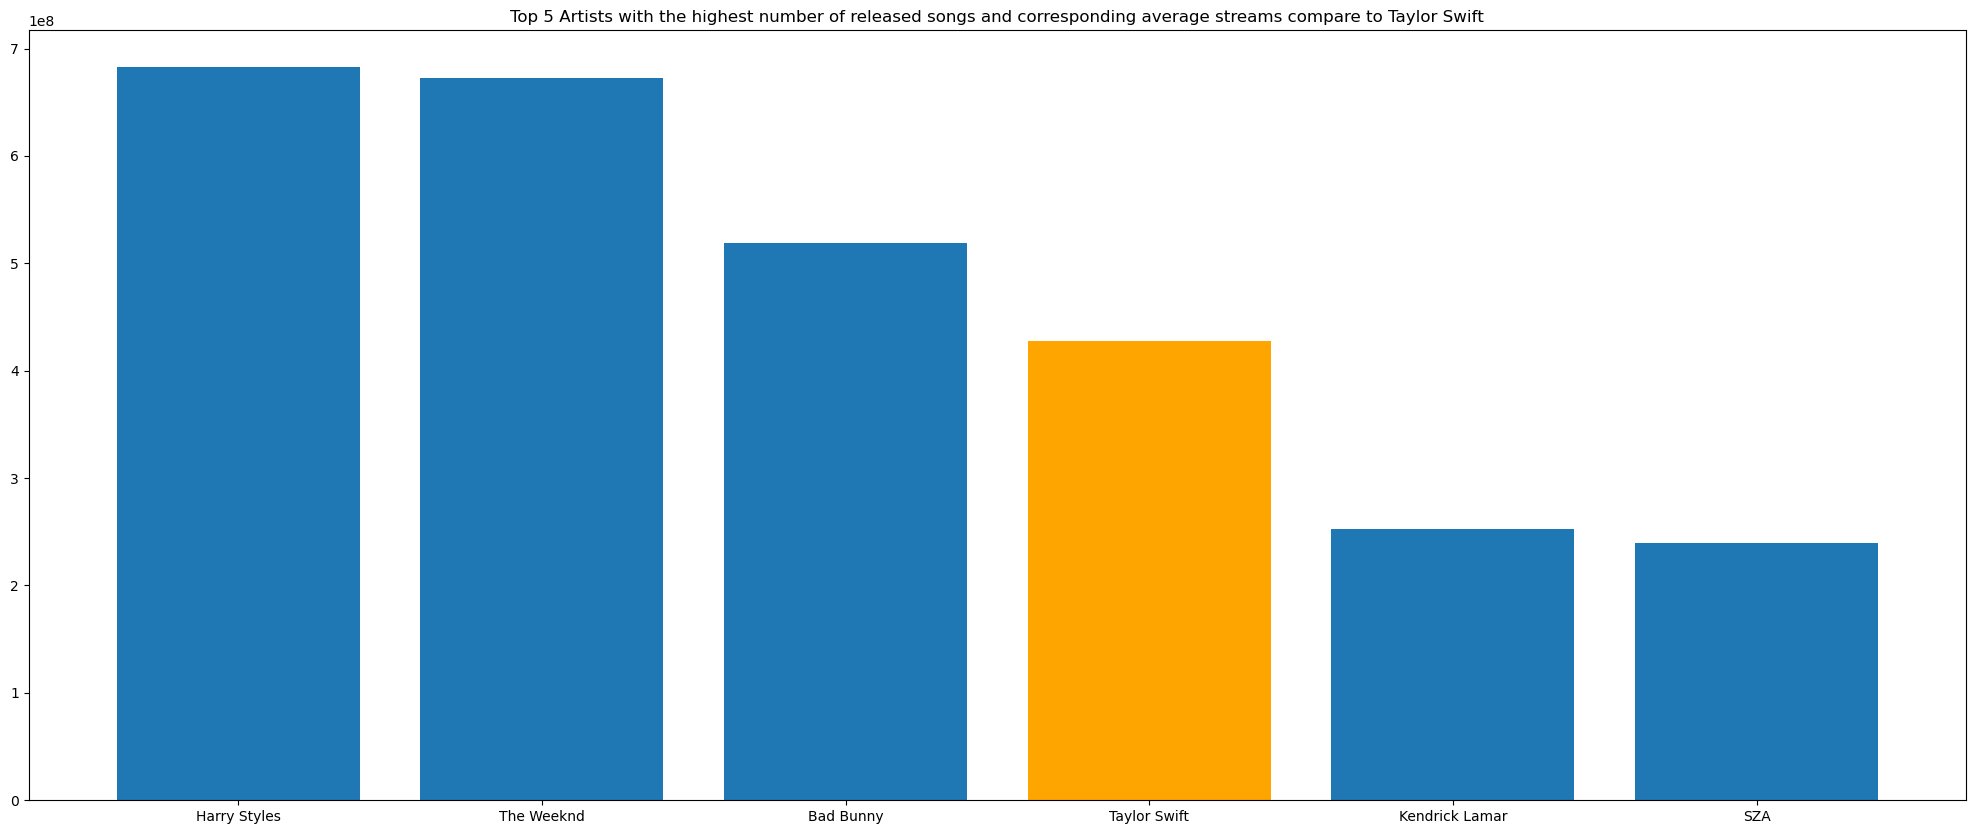

In [301]:
avg_streams_artists = df[df['artist(s)_name'].isin(labels)].groupby(by='artist(s)_name').mean(numeric_only=True)
avg_streams_artists.reset_index(inplace=True)
avg_streams_artists.sort_values(by='streams', ascending=False, inplace=True)
labels = avg_streams_artists['artist(s)_name']
values = avg_streams_artists['streams']
colors = ['orange' if (label=='Taylor Swift') else 'tab:blue' for label in labels]
plt.figure(figsize=(25, 10))
plt.bar(labels, values, color=colors)
plt.title('Top 5 Artists with the highest number of released songs and corresponding average streams compare to Taylor Swift')
plt.show();

- 📝 Comment:

  After consider number of songs that artist released and take the average from the artists who have the highest number of released songs, we see that Taylor Swift's average streams really matter. She is in Top 5 highest artists who have the average streams and we can somehow figure out why she is so famous until now.

<p style='text-align: center;font-weight: bold'><i>Taylor's Songs released date</i></p>

In [302]:
fig_3d_scatter = px.scatter_3d(taylor_songs, x='released_day', y='released_month', z='streams', color='streams',
                               size='streams', hover_name='track_name',
                               title='Day vs Month vs Streams', height=600, width=600)
fig_3d_scatter.show()



- 📝 Comment:
  - Most of Taylor Swift songs released in the **same day and months**(Interesting Fact)
  - The songs keep getting better as we can see the streams increased more and more
  - Our group assumptions: Taylor Swift have planned before hand which date she may released her songs to get the best effects from the listeners 

- What about other artist and their released date?

In [303]:
fig_3d_scatter = px.scatter_3d(df, x='released_day', y='released_month', z='streams', color='streams',
                               size='streams', hover_name='track_name',
                               title='Day vs Month vs Streams', width=600, height=600)
fig_3d_scatter.show()

- 📝 Comment: 
  - We can see most of the songs with high streams released in the first of January(the same released date with Taylor Swift). We can double check the statistics below to see whether this information is correct. And the result is as expected from the 3d scatter plot, most of the artist(Including Taylor Swift), release their songs on the first of January. Which is an interesting facts 

In [304]:
df[['released_day','released_month']].value_counts()[:5]

released_day  released_month
1             1                 62
13            5                 22
6             5                 20
21            10                18
9             12                17
dtype: int64

- How about the year? Does it have any effect?

In [305]:
fig = px.scatter(df, x='released_year', y='streams', color='streams',
                 title='Released year vs. Streams of Artists',
                 
                 hover_name='track_name')
fig.show();

- 📝 Comment:
  - Most of artists released songs after 2000, some of them are very famous until now, for example, `Blinding Lights(2019)` or `Shape of You(2017)`

In [306]:
fig = px.scatter(taylor_songs, x='released_year', y='streams', color='streams',
                 title='Released year vs. Streams of Taylor Swift',
                 
                 hover_name='track_name')
fig.show();

- 📝 Comment:
  - Most of Taylor's songs released in 2022. Her noticeable song is `Blank Space(2014)` with approximately `1.4B` streams
  - There are many competitive songs released in 2022 as the same year that Taylor released most of her songs

<p style='text-align: center;font-weight: bold'><i>Taylor's Songs properties</i></p>

1. Single property and its streams

C:\Users\Nien\AppData\Local\Temp\ipykernel_5292\420384763.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



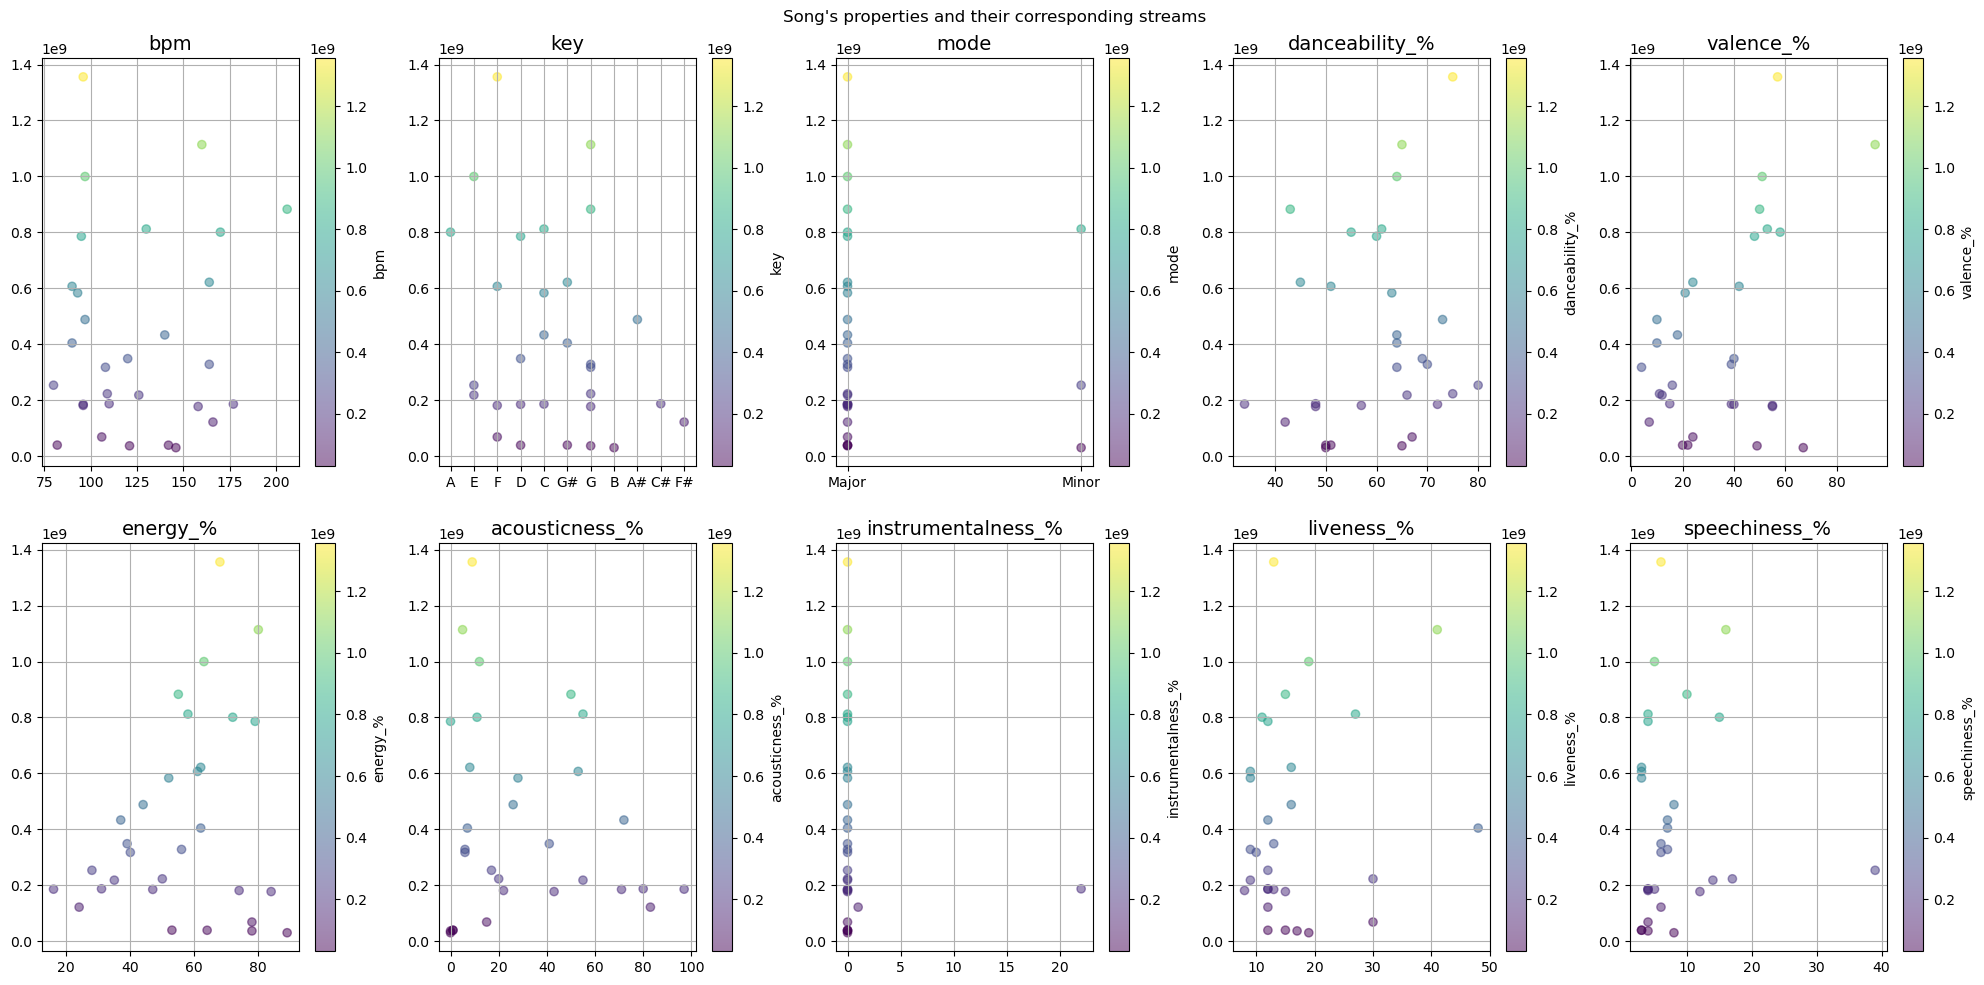

In [307]:
song_properties = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
noticeable_values = {}

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(song_properties):
    noticeable_values.update({column: taylor_songs[column].value_counts().index[0]})
    plt.sca(axes[i])
    
    scatter = plt.scatter(taylor_songs[column], taylor_songs['streams'], c=taylor_songs['streams'], cmap=colormap, alpha=0.5)
    plt.title(f'{column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(song_properties), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Song\'s properties and their corresponding streams')
plt.tight_layout()
plt.show()

In [308]:
noticeable_values

{'bpm': 96,
 'key': 'G',
 'mode': 'Major',
 'danceability_%': 64,
 'valence_%': 40,
 'energy_%': 62,
 'acousticness_%': 0,
 'instrumentalness_%': 0,
 'liveness_%': 12,
 'speechiness_%': 4}

- 📝 Comment: 
  - Her songs used various values in a attribute. Which means that each of her songs has unique style and melody.  
  - Most of her songs the `instrumentalness_%` are low
  - Noticeable values(used in most of her songs):
  
    'bpm': 96,

    'key': 'G',

    'mode': 'Major',

    'danceability_%': 64,

    'valence_%': 40,

    'energy_%': 62,

    'acousticness_%': 0,

    'instrumentalness_%': 0,

    'liveness_%': 12,
    
    'speechiness_%': 4

2. Pair of properties correlation

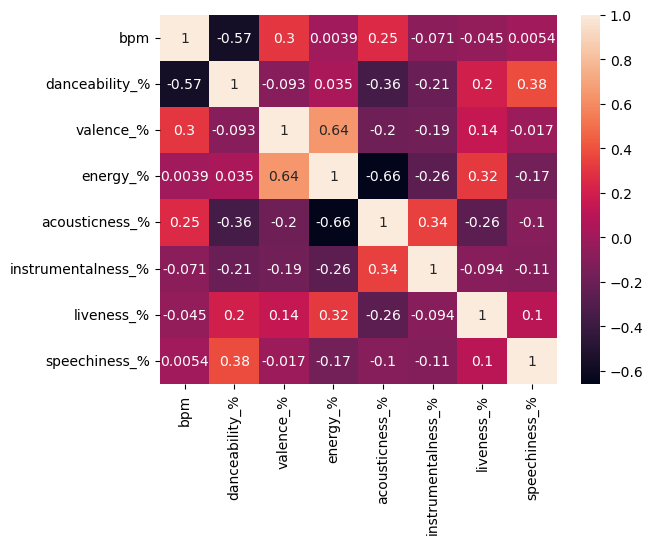

In [309]:
corr = taylor_songs[song_properties].corr(numeric_only=True)
sns.heatmap(corr, annot=True);

- 📝 Comment:

  `danceability_%, bpm` and `acousticness_%, energy_%` are pair of song's properties that have `negative correlation`. Which means that when a song has high `danceability_%`, the `bpm` will be decrease and vice versa

  `energy_%, valence_%` have `positive correlation`. Which means that when a song has high `energy_%`, the `valence_%` is high as well

<p style='text-align: center;font-weight: bold'><i>Taylor's songs in different platform's chart(Spotify, Deezer, Shazam, Apple)</i></p>


<p style='text-align: center;font-weight: bold'><i>Taylor's songs whose rank in Top 10 of each charts</i></p>

C:\Users\Nien\AppData\Local\Temp\ipykernel_5292\2251644898.py:22: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



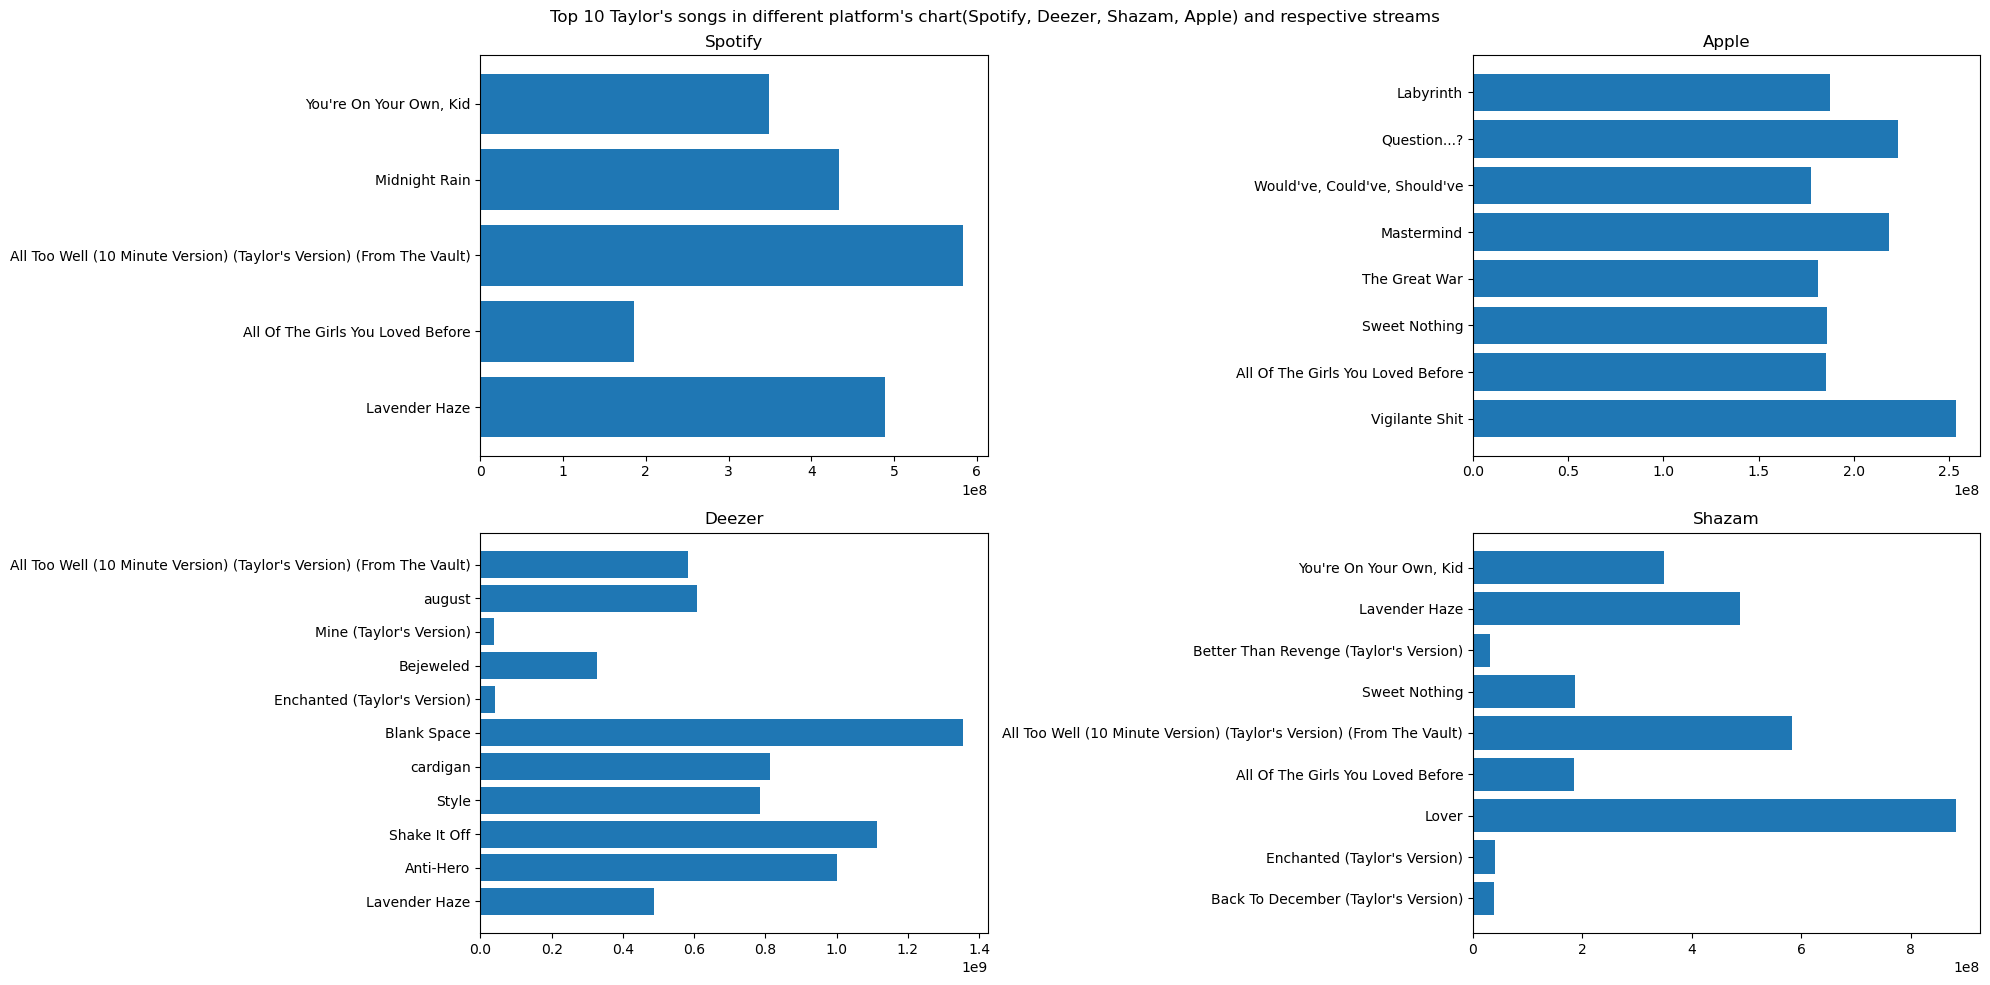

In [310]:
spotify = taylor_songs[(taylor_songs['in_spotify_charts'] != 0) & (taylor_songs['in_spotify_charts'] <= 10)].sort_values(by='in_spotify_charts', ascending=False)
apple = taylor_songs[(taylor_songs['in_apple_charts'] != 0) & (taylor_songs['in_apple_charts'] <= 10)].sort_values(by='in_apple_charts', ascending=False)
deezer = taylor_songs[(taylor_songs['in_deezer_charts'] != 0) & (taylor_songs['in_deezer_charts'] <= 10)].sort_values(by='in_deezer_charts', ascending=False)
shazam = taylor_songs[(taylor_songs['in_shazam_charts'] != 0) & (taylor_songs['in_shazam_charts'] <= 10)].sort_values(by='in_shazam_charts', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0][0].barh(spotify['track_name'], spotify['streams'])
axes[0][0].set_title('Spotify')

axes[0][1].barh(apple['track_name'], apple['streams'])
axes[0][1].set_title('Apple')

axes[1][0].barh(deezer['track_name'], deezer['streams'])
axes[1][0].set_title('Deezer')

axes[1][1].barh(shazam['track_name'], shazam['streams'])
axes[1][1].set_title('Shazam')

fig.suptitle('Top 10 Taylor\'s songs in different platform\'s chart(Spotify, Deezer, Shazam, Apple) and respective streams')
fig.tight_layout()
fig.show()

- 📝 Comment

  We can see that many songs of Taylor are in Top 10 in different charts which is really noticeable. This is one of the prove to make us more appreciate about her efforts in making songs and bring all of them to the top songs of many platforms.

  Below are **top 1** Taylor's song from each chart and it corresponding streams
<center>

| Chart                | Name                             | Streams     |
|-----------------|----------------------------------|-------------|
| Spotify, Shazam | You're On Your Own, Kid          | 348647203.0 |
| Apple           | Labyrinth                        | 187339835.0 |
| Deezer          | All Too Well (10 Minute Version) | 583687007.0 |
</center>

- Does Top 1 in one chart also mean that it will be Top 1 in another chart?

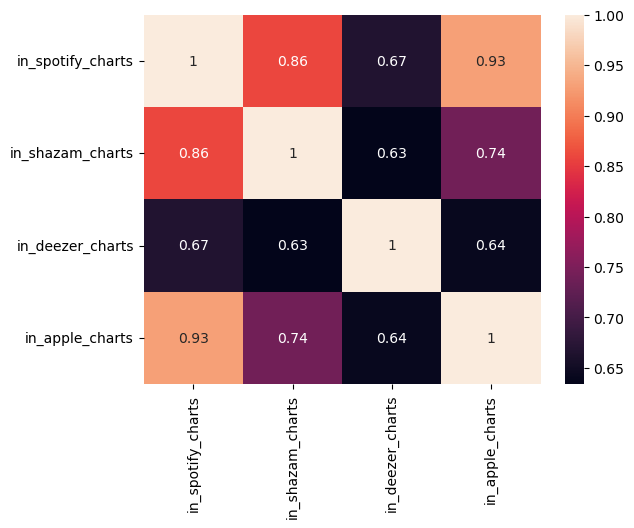

In [311]:
corr = taylor_songs[['in_spotify_charts', 'in_shazam_charts', 'in_deezer_charts', 'in_apple_charts']].corr()
sns.heatmap(corr, annot=True);


- 📝 Comment:

  Taylor's songs in different charts have very **strong positive correlation**. Which means that if a songs in Top 1 in one chart, there is high chance that that song will be at the top rank of another chart.


<p style='text-align: center;font-weight: bold'><i>
How Taylor's songs influence in playlists(Spotify, Deezer, Apple)?
</i></p>

C:\Users\Nien\AppData\Local\Temp\ipykernel_5292\1269942090.py:16: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



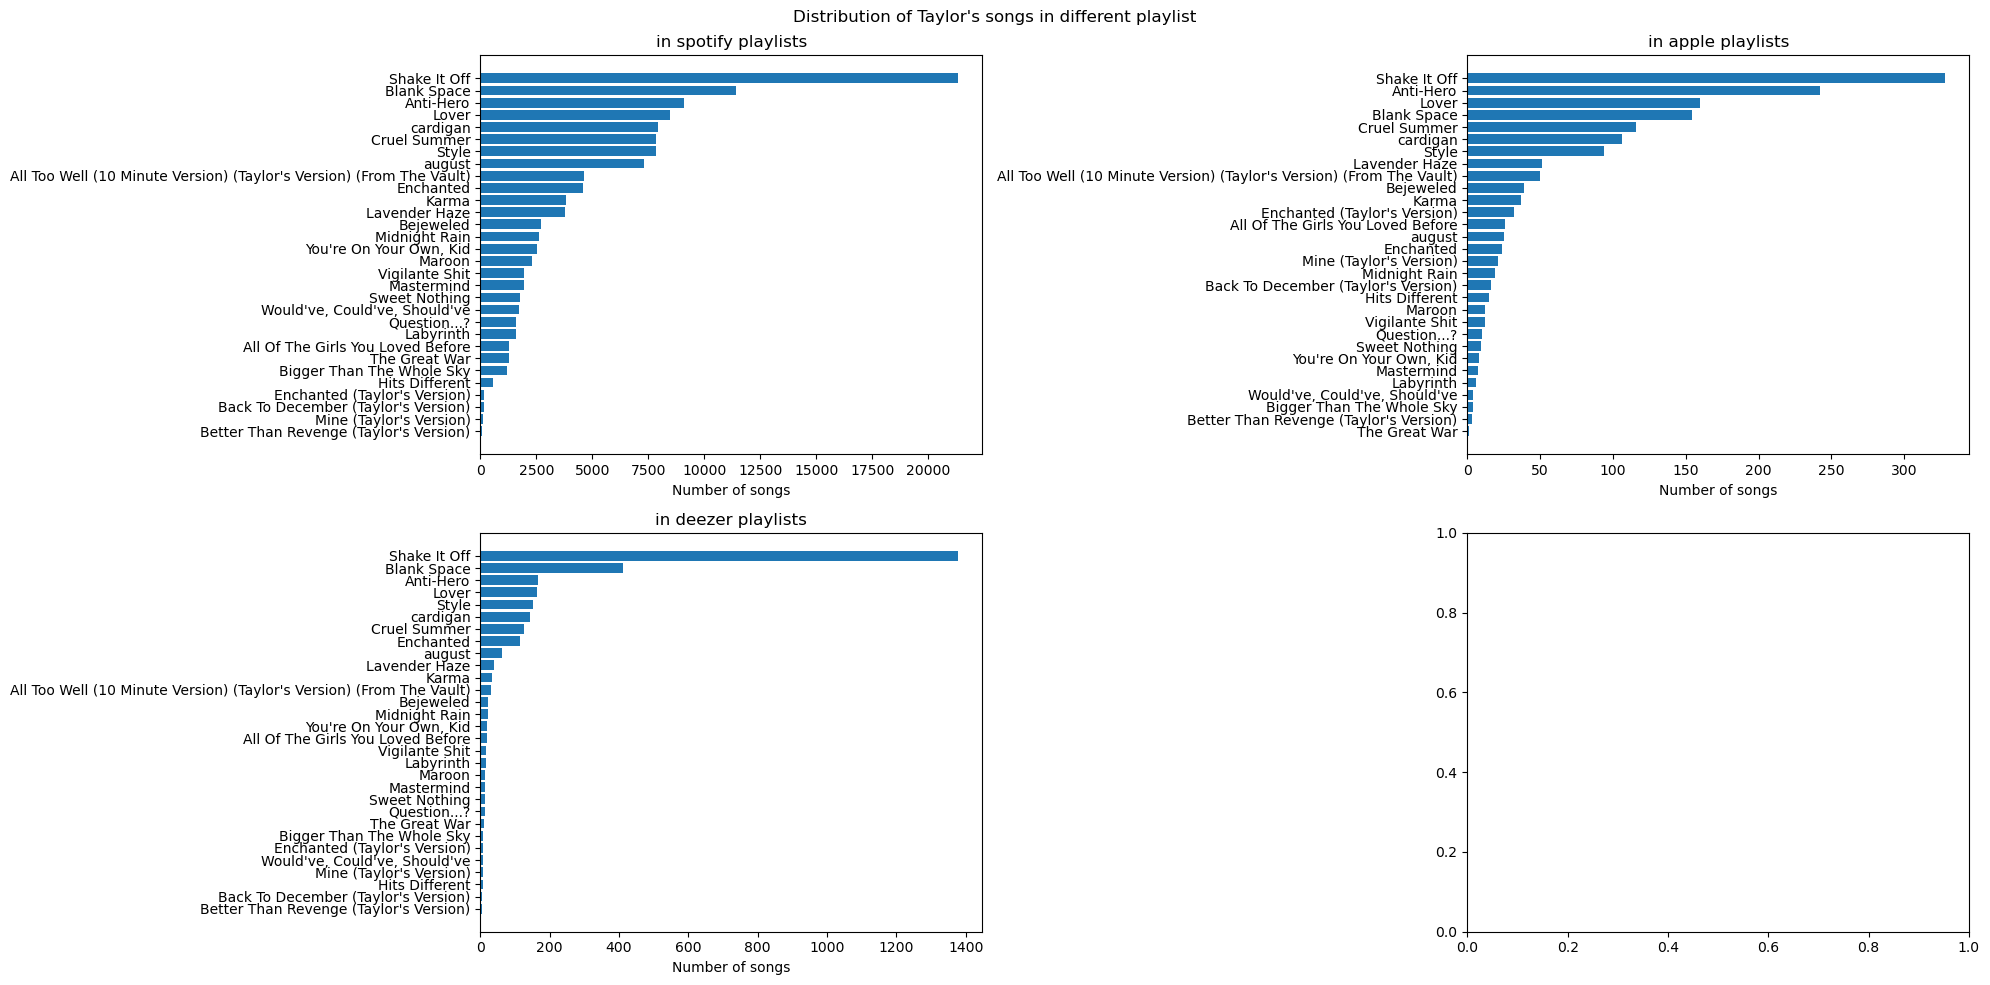

In [312]:
playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

count = 0
for playlist in playlists:
  
  spotify_playlist = taylor_songs.sort_values(by=playlist)
  axes[count//2][count%2].barh(spotify_playlist['track_name'], spotify_playlist[playlist])
  axes[count//2][count%2].set_title(playlist.replace('_', ' '))
  axes[count//2][count%2].set_xlabel('Number of songs')
  count += 1

fig.suptitle('Distribution of Taylor\'s songs in different playlist')
fig.tight_layout()
fig.show();

- 📝 Comment: 
  
  Most of Taylor songs are very famous and people tend to put her songs in their playlists and we can see the number of playlist that her songs are in are very remarkable

  `Shake It Off` dominate in 3 playlists(Spotify, Apple, Deezer), Especially in **Spotify** when the number of playlist that contain `Shake It Off` is above `20000`. In addition, `Shake It Off` take the **first place** in `Apple` and `Deezer` 
  
  

<p style='text-align: center;font-weight: bold'><i>Compare to other artists with highest number of released songs and their average number of songs included in playlists as well</i></p>

C:\Users\Nien\AppData\Local\Temp\ipykernel_5292\274198589.py:26: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



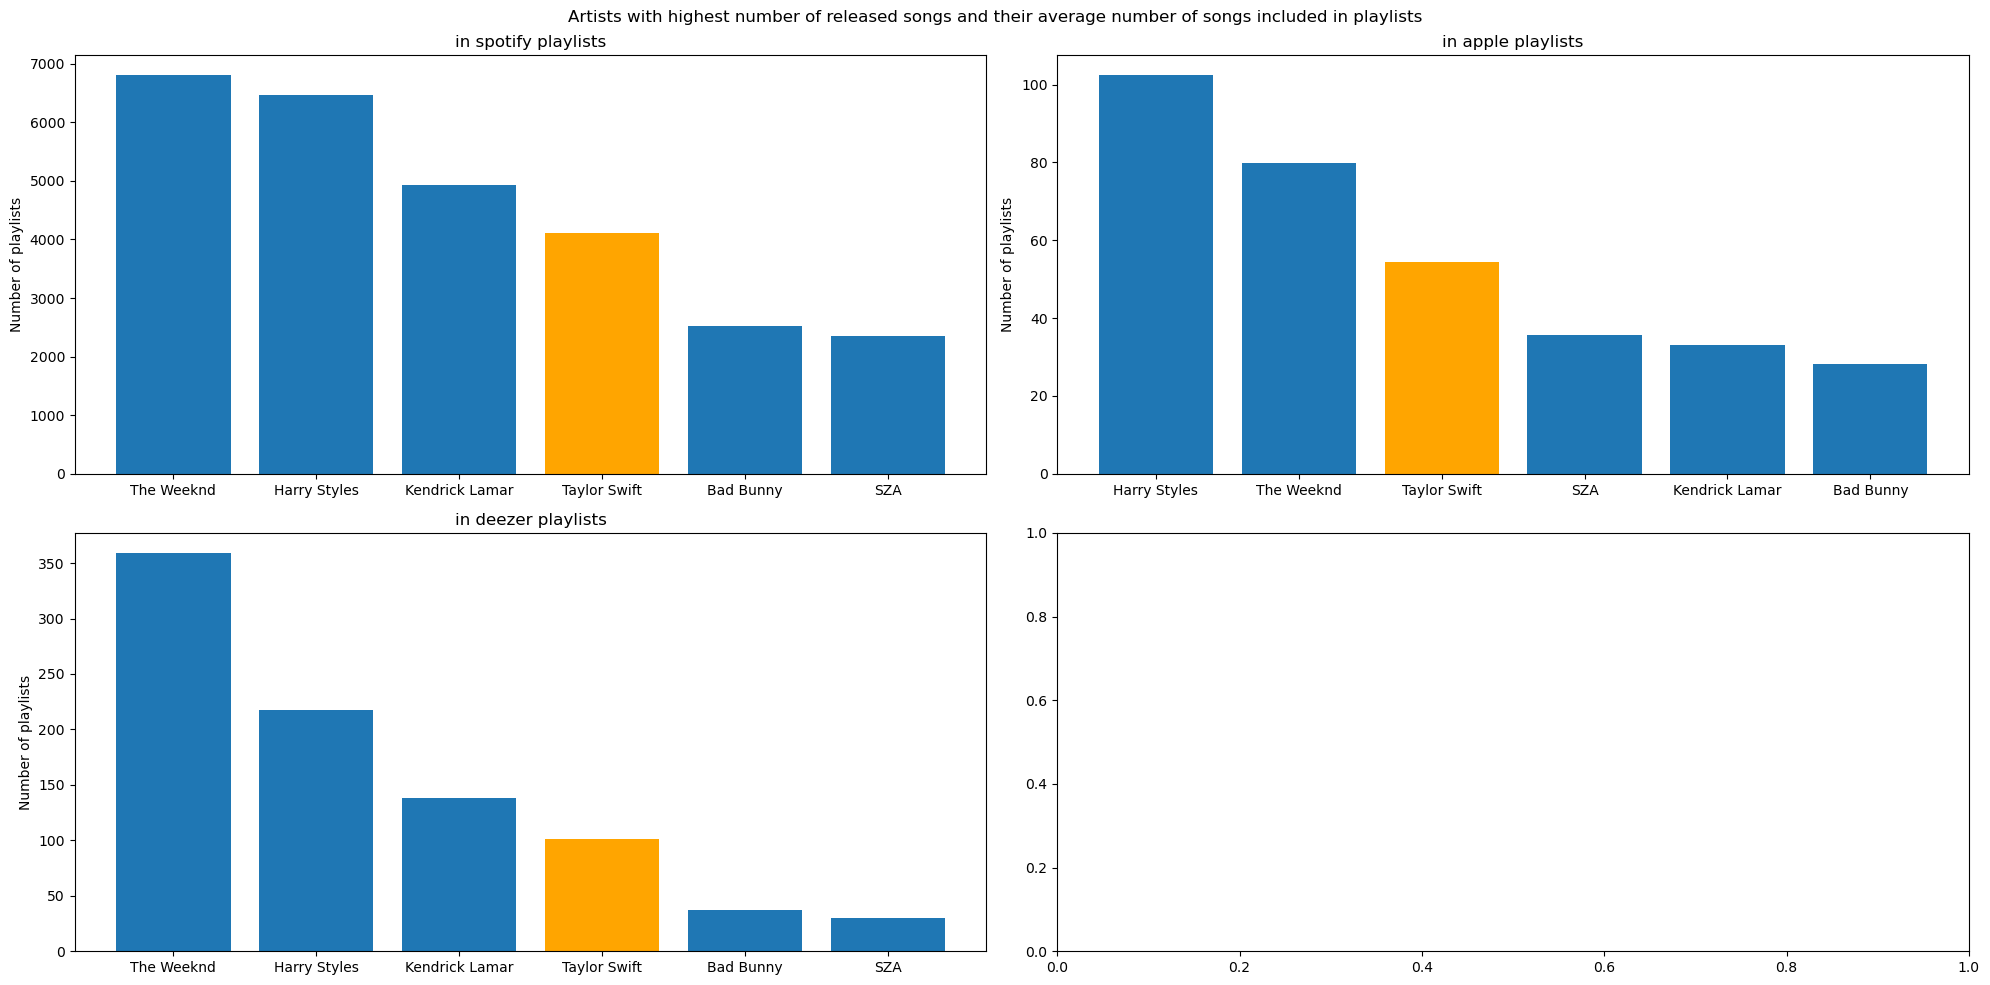

In [313]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

count = 0
for playlist in playlists:
  mean_playlists = df[df['artist(s)_name'].isin(labels)][['artist(s)_name', playlist]].groupby('artist(s)_name').mean()

  mean_playlists.reset_index(inplace=True)

  mean_playlists = mean_playlists.sort_values(by=playlist, ascending=False)

  labels = mean_playlists['artist(s)_name']

  colors = ['orange' if (label=='Taylor Swift') else 'tab:blue' for label in labels]
    
  axes[count//2][count%2].bar(mean_playlists['artist(s)_name'], mean_playlists[playlist], color=colors)
  axes[count//2][count%2].set_title(playlist.replace('_', ' '))
  axes[count//2][count%2].set_ylabel('Number of playlists')
  
  count += 1

fig.suptitle('Artists with highest number of released songs and their average number of songs included in playlists')
fig.tight_layout()
fig.show();

- 📝 Comment:
  - Taylor Swift's average number of playlists which included her songs are very high in various platforms(Spotify, Deezer or Apple)
  - We see that when we compare the number of songs that an artists released, we will have a clearly view of how influent her songs are with the trend of music nowadays.

<p style='text-align: center;font-weight: bold'>Taylor's songs with collab artists<i>

- We can see that all of her songs are not collab with any singers. Which means that her efforts in making songs become famous are something that we need to appreciate 

In [314]:
taylor_songs['artist_count'].value_counts()

1    30
Name: artist_count, dtype: int64

- How about others artists songs with Taylor Swift collab in their song

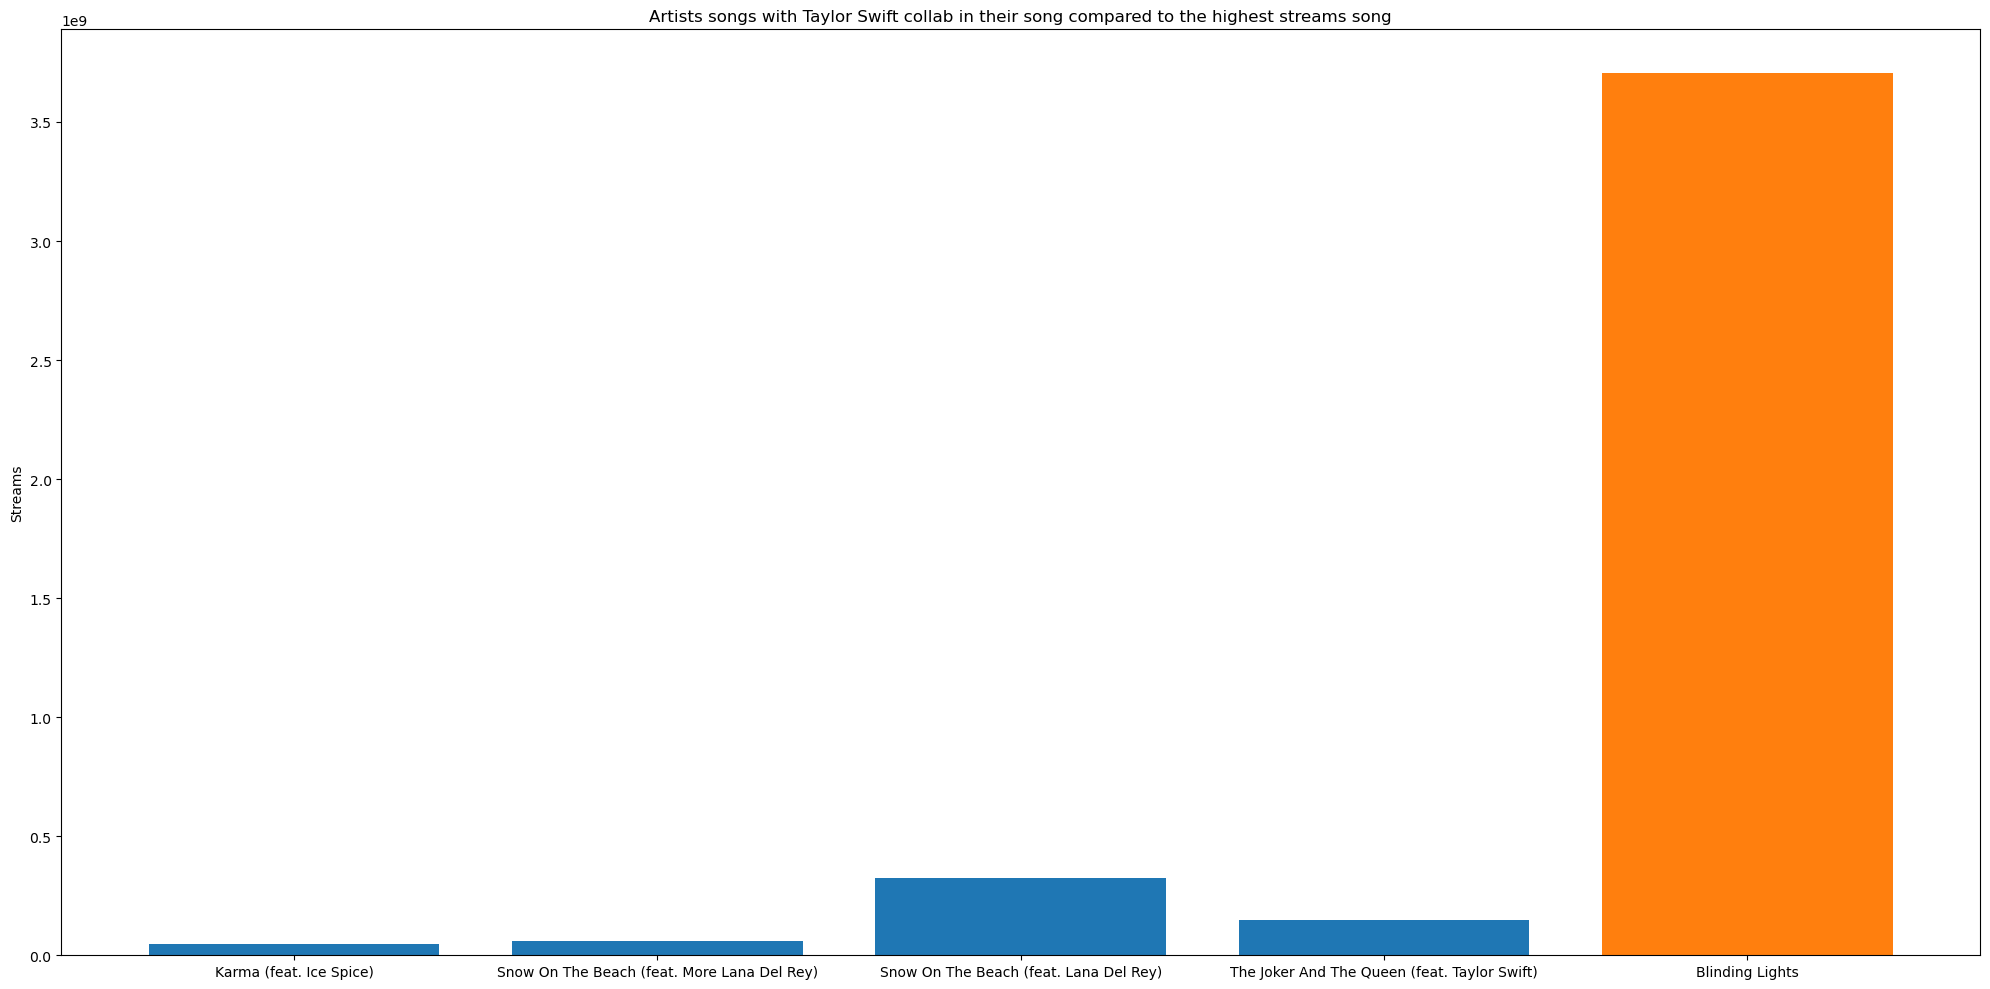

In [315]:
collab = []

for name in df['artist(s)_name']:
  number_of_artists = len(name.split(','))
  if 'Taylor Swift' in name and number_of_artists > 1:
    collab.append(name)

collab_song = df[df['artist(s)_name'].isin(collab)]

plt.figure(figsize=(20, 10))
plt.bar(collab_song['track_name'], collab_song['streams'])
plt.bar(best_one['track_name'], best_one['streams'])
plt.ylabel('Streams')
plt.title('Artists songs with Taylor Swift collab in their song compared to the highest streams song')
plt.tight_layout()
plt.show();

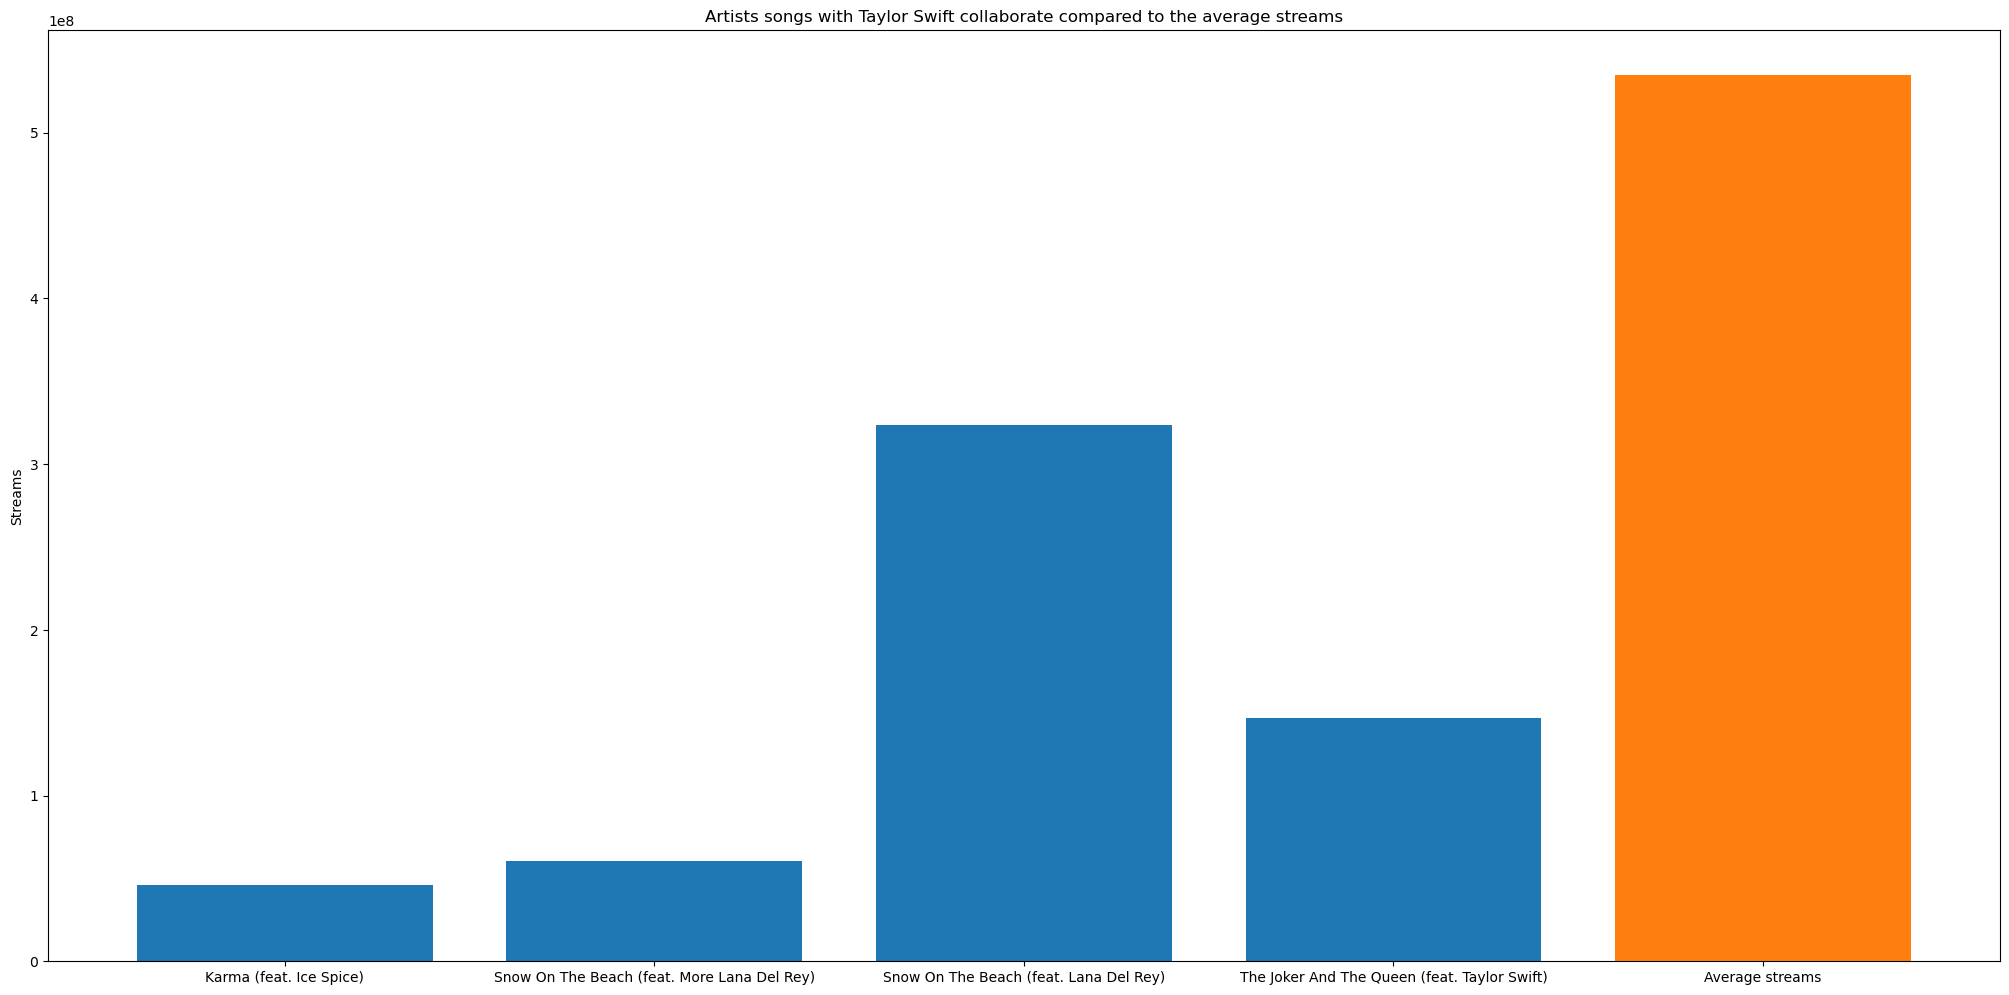

In [316]:
plt.figure(figsize=(20, 10))
plt.bar(collab_song['track_name'], collab_song['streams'])
plt.bar('Average streams', df['streams'].mean())
plt.tight_layout()
plt.title('Artists songs with Taylor Swift collaborate compared to the average streams')
plt.ylabel('Streams')
plt.show();

- 📝 Comment:

  We can see that other artists' songs with Taylor collaborate are not significantly high.

  However, in average streams, Taylor in somehow still make the other artists songs become well-known to the audience and the streams are good.

#### Determine which factors contribute the most in Taylor's songs

- In the above section we have a general view about how Taylor Swift's songs become famous by looking into her songs' properties and analysed it. In this section, we will try to figure out whether in Taylor's songs, is there any specific key factor that can contribute to her success song.

- Take a quick glance at her songs and respective properties

In [317]:
taylor_songs[song_properties].describe()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,124.500000,59.700000,35.066667,55.966667,29.800000,0.766667,16.533333,7.900000
std,33.636751,11.368893,21.750836,19.074235,29.117361,4.014485,9.533004,7.155177
min,80.000000,34.000000,4.000000,16.000000,0.000000,0.000000,8.000000,3.000000
25%,96.000000,50.250000,16.500000,41.000000,6.250000,0.000000,12.000000,4.000000
50%,115.000000,63.500000,39.000000,57.000000,18.500000,0.000000,13.000000,6.000000
75%,155.000000,66.750000,50.750000,71.000000,52.250000,0.000000,16.750000,8.000000
max,206.000000,80.000000,95.000000,89.000000,97.000000,22.000000,48.000000,39.000000


- 📝 Comment
  
  1. The `instrumentalness_%` std is not large, so we can see that most of Taylor songs this factor **is not change so much**
  
  2. The `bpm` std is quite large, so this is the factor that Taylor adjust most frequently to achieve a good song that we hear today

  3. Other statistics can help we gain some insights to know more about Taylor songs

- `Blank Space` is the most popular one that we can see from the analyzed section above, so take a quick look at it

In [318]:
final = pd.DataFrame()
final = pd.concat([final, taylor_songs[taylor_songs['track_name'] == 'Blank Space'][song_properties]])

taylor_songs[taylor_songs['track_name'] == 'Blank Space'][song_properties].T

,34
bpm,96
key,F
mode,Major
danceability_%,75
valence_%,57
energy_%,68
acousticness_%,9
instrumentalness_%,0
liveness_%,13
speechiness_%,6


- Top 10 songs in Spotify chart and their factors

In [319]:
final = pd.concat([final, spotify[song_properties]])

spotify[song_properties].T

,216,245,481,283,391
bpm,97,96,93,140,120
key,A#,D,C,C,D
mode,Major,Major,Major,Major,Major
danceability_%,73,72,63,64,69
valence_%,10,40,21,18,40
energy_%,44,47,52,37,39
acousticness_%,26,71,28,72,41
instrumentalness_%,0,0,0,0,0
liveness_%,16,13,9,12,13
speechiness_%,8,4,3,7,6


- Top 10 songs in Apple chart and their factors

In [320]:
final = pd.concat([final, apple[song_properties]])

apple[song_properties].T

,828,245,835,842,831,836,829,833
bpm,80,96,177,96,126,158,109,110
key,E,D,C,F,E,G,G,C#
mode,Minor,Major,Major,Major,Major,Major,Major,Major
danceability_%,80,72,34,57,66,48,75,48
valence_%,16,40,39,55,12,55,11,15
energy_%,28,47,16,74,35,84,50,31
acousticness_%,17,71,97,22,55,43,20,80
instrumentalness_%,0,0,0,0,0,0,0,22
liveness_%,12,13,12,8,9,15,30,12
speechiness_%,39,4,5,4,14,12,17,4


- Top 10 songs in Deezer chart and their factors

In [321]:
final = pd.concat([final, deezer[song_properties]])

deezer[song_properties].T

,216,31,163,35,56,34,64,438,104,109,481
bpm,97,97,160,95,130,96,82,164,121,90,93
key,A#,E,G,D,C,F,G#,G,G,F,C
mode,Major,Major,Major,Major,Minor,Major,Major,Major,Major,Major,Major
danceability_%,73,64,65,60,61,75,51,70,65,51,63
valence_%,10,51,95,48,53,57,22,39,49,42,21
energy_%,44,63,80,79,58,68,53,56,78,61,52
acousticness_%,26,12,5,0,55,9,1,6,0,53,28
instrumentalness_%,0,0,0,0,0,0,0,0,0,0,0
liveness_%,16,19,41,12,27,13,15,9,17,9,9
speechiness_%,8,5,16,4,4,6,3,7,4,3,3


- Top 10 songs in Shazam chart and their factors

In [322]:
final = pd.concat([final, shazam[song_properties]])

shazam[song_properties].T

,76,64,92,245,481,835,178,216,391
bpm,142,82,206,96,93,177,146,97,120
key,D,G#,G,D,C,C,B,A#,D
mode,Major,Major,Major,Major,Major,Major,Minor,Major,Major
danceability_%,50,51,43,72,63,34,50,73,69
valence_%,20,22,50,40,21,39,67,10,40
energy_%,64,53,55,47,52,16,89,44,39
acousticness_%,1,1,50,71,28,97,0,26,41
instrumentalness_%,0,0,0,0,0,0,0,0,0
liveness_%,12,15,15,13,9,12,19,16,13
speechiness_%,3,3,10,4,3,5,8,8,6


- Top 1 song with highest number of playlists(Spotify, Apple, Deezer)

In [323]:
final = pd.concat([final, taylor_songs[taylor_songs['track_name'] == 'Shake It Off'][song_properties]])

taylor_songs[taylor_songs['track_name'] == 'Shake It Off'][song_properties].T

,163
bpm,160
key,G
mode,Major
danceability_%,65
valence_%,95
energy_%,80
acousticness_%,5
instrumentalness_%,0
liveness_%,41
speechiness_%,16


- Some of remarkable songs and their factors

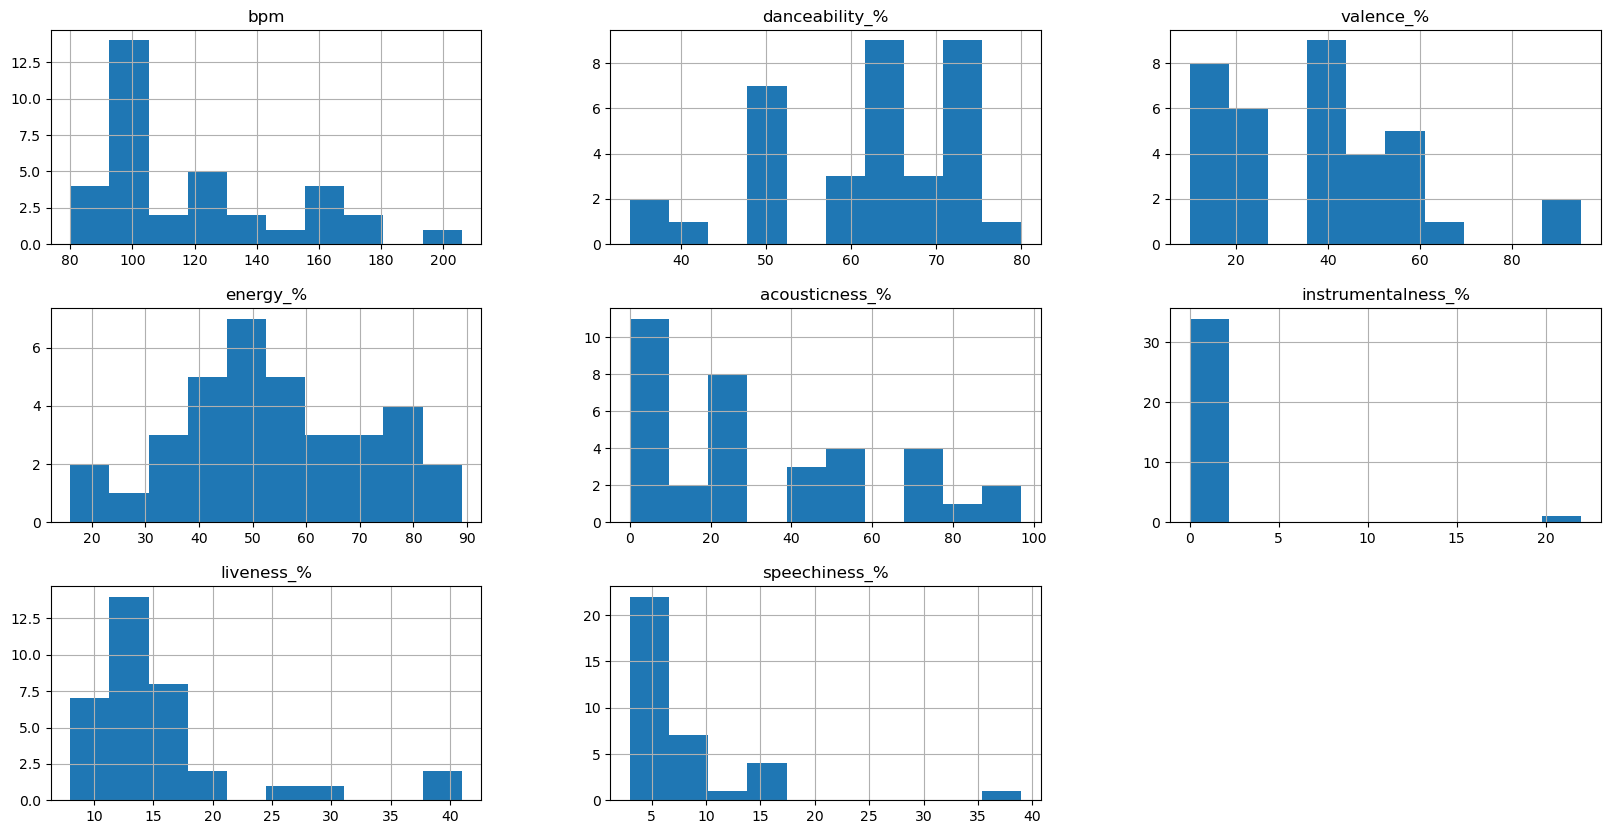

In [329]:
final.hist(figsize=(20, 10));

- Best factors that we can find from best songs from Taylor Swift's songs

In [337]:
final_dict = {}
for col in final.columns:
  final_dict.update({col: final[col].value_counts().index[0]})

pd.DataFrame.from_records([final_dict]).T

,0
bpm,96
key,D
mode,Major
danceability_%,75
valence_%,40
energy_%,47
acousticness_%,71
instrumentalness_%,0
liveness_%,13
speechiness_%,4


### 2.3 Answer the question

After investigate by plotting and analyzing her songs, we come to the conclusion:

  1. Taylor Swift is **versatile artist**: perform several genres of music and perform them well

  2. `Blank Space` is the most popular songs of her 

  3. The **average streams** of her songs is remarkable compare to other famous artists

  4. The `released day`, `released month` are factor that we need to consider as many artists choosed this date to released his/her song(include Taylor)

  5. The way Taylor compose her songs is diverse, some songs are high in one properties but low other properties. However, that song still can reach us in some way.

  6. Her songs' rank are very high in multiple platform(Spotify, Apple, Deezer). Most of them are in top 10 and some of them are in Top 1

  7. Average song of playlists of all of her songs are also very high(in Top 5 songs)

Best factors that we can find from Taylor Swift's best songs:

<center>

| Best factors      | Value |
|-------------------|-------|
| bpm               | 96    |
| key               | D     |
| mode              | Major |
| danceability_%    | 75    |
| valence_%         | 40    |
| energy_%          | 47    |
| acousticness_%    | 71    |
| intrumentalness_% | 0     |
| liveness_%        | 13    |
| speechiness_%     | 4     |
</center>